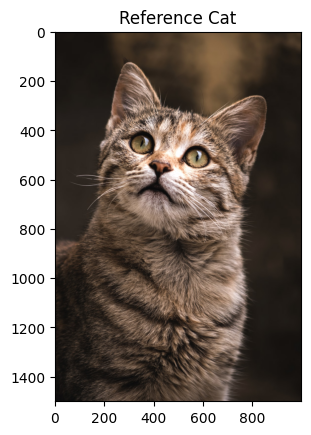

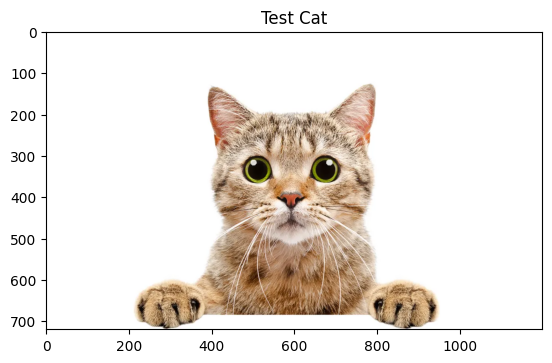

Classification result: MATCH


In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


def show_image(image_path, image_title):
  img = mpimg.imread(image_path)
  imgplot_ = plt.imshow(img)
  plt.title(image_title)
  plt.show()

def spectral_angle_mapper(image, reference):
    resize_scaling = 50
    resize_width = int(reference.shape[1] * resize_scaling/100)
    resize_hieght = int(reference.shape[0] * resize_scaling/100)
    resized_dimensions = (resize_width, resize_hieght)
  
    resized_reference = cv2.resize(reference, resized_dimensions,
                               interpolation=cv2.INTER_AREA)
    
    resized_image = cv2.resize(image, resized_dimensions,
                               interpolation=cv2.INTER_AREA)
  
  
    image_norm = resized_image.astype(float) / np.linalg.norm(image)
    reference_norm = resized_reference.astype(float) / np.linalg.norm(reference)


    dot_product = np.sum(image_norm * reference_norm)
    angle = np.arccos(dot_product)

    return angle

def classify_image(image_path, reference_path, threshold):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    reference = cv2.imread(reference_path, cv2.IMREAD_COLOR)

    angle = spectral_angle_mapper(image, reference)

    if angle <= threshold:
        classification = "Match".upper()
    else:
        classification = "No Match".upper()

    return classification


image_path = "/content/test_cat.jpg"
reference_path = "/content/reference_cat.jpeg"
threshold = 5

show_image(reference_path, 'Reference Cat')
show_image(image_path, 'Test Cat')


result = classify_image(image_path, reference_path, threshold)
print("Classification result:", result)
